# <font color=orange>**OpenCV ile Nesne Takibi**</font>

## <font color=gold>**Takip Algoritmalari**</font> <font color=gray>**Tracking-Techniques**</font>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

In [7]:
OPENCV_OBJECT_TRACKERS = {'csrt'         : cv2.TrackerCSRT_create,
                          'kcf'          : cv2.TrackerKCF_create,
                          'boosting'     : cv2.legacy_TrackerBoosting,
                          'mil'          : cv2.TrackerMIL_create,
                          'tld'          : cv2.legacy_TrackerTLD,
                          'medianflow'   : cv2.legacy_TrackerMedianFlow,
                          'mosse'        : cv2.legacy_TrackerMOSSE}

tracker_name = 'boosting'
tracker = OPENCV_OBJECT_TRACKERS[tracker_name]()
print('Tracker:',tracker_name)

gt = pd.read_csv('gt_new.txt')

video_path = 'MOT17-13-SDP.mp4'

cap = cv2.VideoCapture(video_path)

# Genel Parametreler:

initBB = None
fps = 25
frame_number = []
f = 0
success_track_frame_success = 0
track_list = []
start_time = time.time()

while True:
    # videoyu yavaslatma
    time.sleep(0.01)
    
    ret, frame = cap.read()
    
    if ret:
        frame = cv2.resize(frame, dsize=(960,540))
        (H, W)= frame.shape[:2]
        
        #gt
        car_gt = gt[gt.frame_no == f]
        if len(car_gt) != 0:
            x = car_gt.x.values[0]
            y = car_gt.y.values[0]
            w = car_gt.w.values[0]
            h = car_gt.h.values[0]
            
            center_x = car_gt.center_x.values[0]
            center_y = car_gt.center_y.values[0]
            
            cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)
            cv2.circle(frame, (center_x, center_y), 2, (0,0,255), -1)
            
        #
        
        cv2.imshow('Frame',frame)
        # key
        key = cv2.waitKey(1) & 0xFF
        if key == ord('q'): break
    
        frame_number.append(f)
        f = f+1
    else: 
        break
        
cap.release()
cv2.destroyAllWindows()

Tracker: boosting


Tracker: mil
Tracking method:  < cv2.TrackerMIL 0000020D679CD950>
Time:  50.48779296875
Number of frame to track (gt):  327
Number of frame to track (track success):  257
Toplam hata:  12553.194897767466


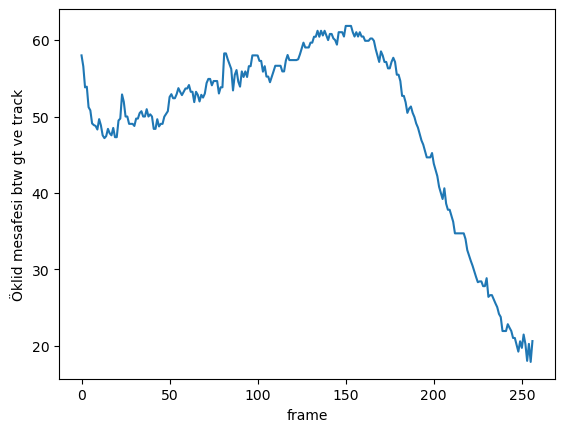

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

OPENCV_OBJECT_TRACKERS = {'csrt'         : cv2.TrackerCSRT_create,
                          'kcf'          : cv2.TrackerKCF_create,
                          'boosting'     : cv2.legacy_TrackerBoosting,
                          'mil'          : cv2.TrackerMIL_create,
                          'tld'          : cv2.legacy_TrackerTLD,
                          'medianflow'   : cv2.legacy_TrackerMedianFlow,
                          'mosse'        : cv2.legacy_TrackerMOSSE}

tracker_name = "mil"
tracker = OPENCV_OBJECT_TRACKERS[tracker_name]()
print("Tracker:", tracker_name)

gt = pd.read_csv("gt_new.txt")

video_path = "MOT17-13-SDP.mp4"
cap = cv2.VideoCapture(video_path)

# genel parametreler
initBB = None
fps = 25
frame_number = []
f = 0
success_track_frame_success = 0
track_list = []
start_time = time.time() 

while True:
    # videoyu yavaslatma
    time.sleep(0.01)
    
    ret, frame = cap.read()
    
    if ret:
        
        frame = cv2.resize(frame, dsize = (960,540))
        (H, W) = frame.shape[:2]
        
        # Ground Truth
        car_gt = gt[gt.frame_no == f]
        if len(car_gt) != 0:
            x = car_gt.x.values[0]
            y = car_gt.y.values[0]
            w = car_gt.w.values[0]
            h = car_gt.h.values[0]
            
            center_x = car_gt.center_x.values[0]
            center_y = car_gt.center_y.values[0]
            
            cv2.rectangle(frame, (x,y), (x+w, y+h),(0,255,0),2)
            cv2.circle(frame, (center_x, center_y), 2,(0,0,255),-1)
            
        # Takip Sonuclari
        # box
        if initBB is not None:
            
            (success, box) = tracker.update(frame)
            
            if f<=np.max(gt.frame_no):
                (x,y,w,h) = [int(i) for i in box]
                
                cv2.rectangle(frame, (x,y),(x+w,y+h),(0,0,255),2)
                success_track_frame_success = success_track_frame_success + 1
                track_center_x = int(x+w/2)
                track_center_y = int(y+h/2)
                track_list.append([f,track_center_x,track_center_y])
            
            info = [("Tracker",tracker_name),
                    ("Success", "Yes" if success else "No")]
            
            for (i,(o,p)) in enumerate(info):
                text = "{}: {} ".format(o,p)
                cv2.putText(frame, text, (10, H -(i*20)-10), cv2.FONT_HERSHEY_SIMPLEX,0.6, (0,0,255),2)
            
        cv2.putText(frame,"Frame Num: "+str(f), (10,30),cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255),2)
        cv2.imshow("frame",frame)    
        # key
        key = cv2.waitKey(1) & 0xFF
           
        if key == ord("t"):
            initBB = cv2.selectROI("Frame", frame, fromCenter = False)
            
            tracker.init(frame, initBB)
            
        elif key == ord("q"):break
        
        
        # frame
        frame_number.append(f)
        f = f + 1 
        
    else: break
    
cap.release()
cv2.destroyAllWindows()            
            
stop_time = time.time()
time_diff = stop_time - start_time          
# degerlendirme

track_df = pd.DataFrame(track_list, columns =["frame_no","center_x","center_y"])

if len(track_df) != 0:
    print("Tracking method: ",tracker)
    print("Time: ",time_diff)
    print("Number of frame to track (gt): ",len(gt))
    print("Number of frame to track (track success): ",success_track_frame_success)
    
    track_df_frame = track_df.frame_no
    
    gt_center_x = gt.center_x[track_df_frame].values
    gt_center_y = gt.center_y[track_df_frame].values
    
    track_df_center_x = track_df.center_x.values
    track_df_center_y = track_df.center_y.values
    
    plt.plot(np.sqrt((gt_center_x-track_df_center_x)**2 + (gt_center_y-track_df_center_y)**2 ))
    plt.xlabel("frame")
    plt.ylabel("Öklid mesafesi btw gt ve track")
    error = np.sum(np.sqrt((gt_center_x-track_df_center_x)**2 + (gt_center_y-track_df_center_y)**2 ))
    print("Toplam hata: ",error)